<a href="https://colab.research.google.com/github/ChristophWuersch/AppliedNeuralNetworks/blob/main/U02/BinaryClassification_HeartDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="Bilder/ost_logo.png" width="240" height="120" align="right"/>
<div style="text-align: left"> <b> Applied Neural Networks | FS 2022 </b><br>
<a href="mailto:christoph.wuersch@ost.ch"> © Christoph Würsch </a> </div>
<a href="https://www.ost.ch/de/forschung-und-dienstleistungen/technik/systemtechnik/ice-institut-fuer-computational-engineering/"> Eastern Switzerland University of Applied Sciences OST | ICE </a>

# Binäre Klassifikation mit kontinuierlichen und kategorischen Merkmalen

**Author:** 
- Christoph Würsch, Eastern Switzerland University of Applied Science OST
- [Francois Chollet](https://twitter.com/fchollet)<br>



Diese Übungsserie zeigt, wie eine strukturierte Datenklassifizierung ausgehend von einer rohen
CSV-Datei mit keras vorgenommen werden kann. Die verwendeten Daten enthalten sowohl numerische als auch kategorische Merkmale. Wir verwenden Keras Vorverarbeitungsschichten zur Normalisierung der numerischen Merkmale und zur Vektorisierung (one-hot-coding) der kategorischen Merkmale.

### Der Datensatz

[Unser Datensatz](https://archive.ics.uci.edu/ml/datasets/heart+Disease) wird von der Cleveland Clinic Foundation für Herzkrankheiten zur Verfügung gestellt. Es handelt sich um eine CSV-Datei mit 303 Zeilen. Jede Zeile enthält Informationen über einen Patienten (eine **Stichprobe**), und jede Spalte beschreibt ein Attribut des Patienten (ein **Merkmal**). Wir verwenden die Merkmale, um vorherzusagen, ob ein Patient eine Herzerkrankung hat (**binäre Klassifizierung**).



Hier ist eine Zusammenfassung der Merkmale:

Column| Description| Feature Type
------------|--------------------|----------------------
Age | Age in years | Numerical
Sex | (1 = male; 0 = female) | Categorical
CP | Chest pain type (0, 1, 2, 3, 4) | Categorical
Trestbpd | Resting blood pressure (in mm Hg on admission) | Numerical
Chol | Serum cholesterol in mg/dl | Numerical
FBS | fasting blood sugar in 120 mg/dl (1 = true; 0 = false) | Categorical
RestECG | Resting electrocardiogram results (0, 1, 2) | Categorical
Thalach | Maximum heart rate achieved | Numerical
Exang | Exercise induced angina (1 = yes; 0 = no) | Categorical
Oldpeak | ST depression induced by exercise relative to rest | Numerical
Slope | Slope of the peak exercise ST segment | Numerical
CA | Number of major vessels (0-3) colored by fluoroscopy | Both numerical & categorical
Thal | 3 = normal; 6 = fixed defect; 7 = reversible defect | Categorical
Target | Diagnosis of heart disease (1 = true; 0 = false) | Target

## Setup

In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.5.0


## (a) Datensatz laden

Wir laden wir die Daten herunter und speichern diese in einen Pandas-Dataframe:

In [63]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)


In [64]:
df.to_csv('heart.csv')

Der Datensatz umfasst 303 Proben mit 14 Spalten pro Probe (13 Merkmale, plus die Zielbezeichnung Bezeichnung):

In [65]:
df.shape

(303, 14)

Die letzte Spalte, `target`, gibt an, ob der Patient eine Herzerkrankung hat (`1`) oder nicht (`0`).


## (b) EDA

Hier ist ein kurzer Einblick in die Daten:

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [67]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


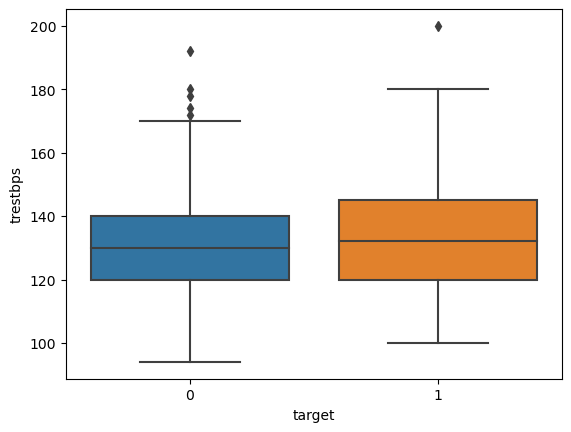

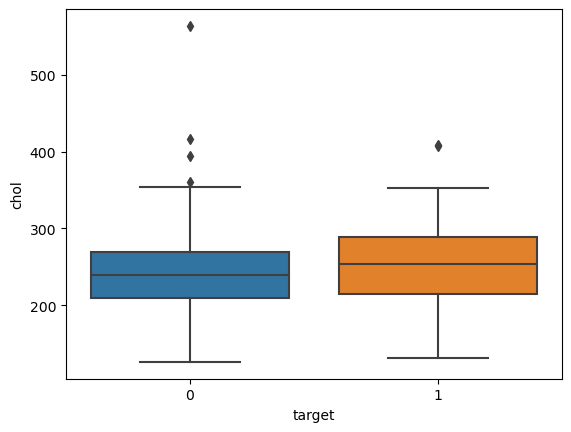

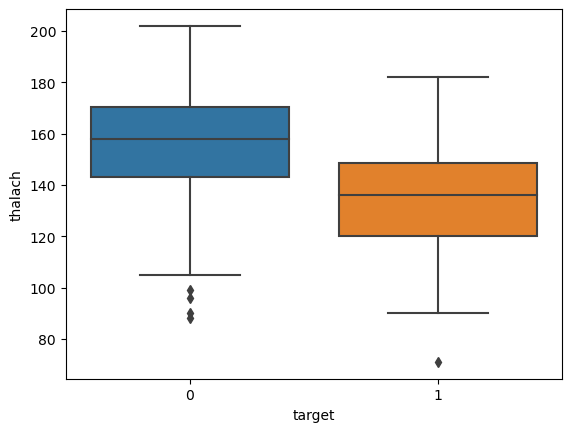

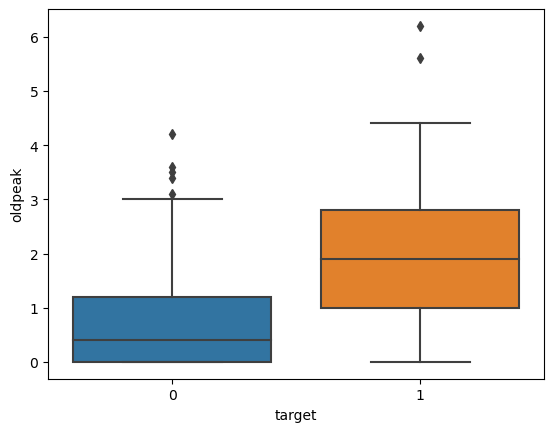

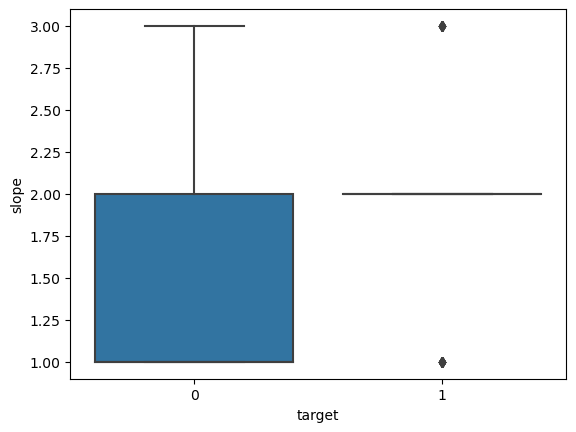

<Figure size 640x480 with 0 Axes>

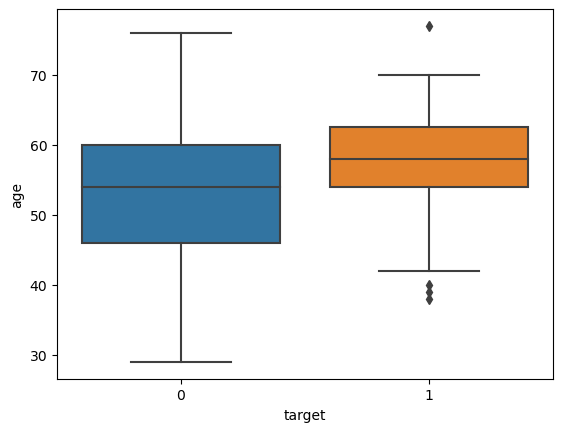

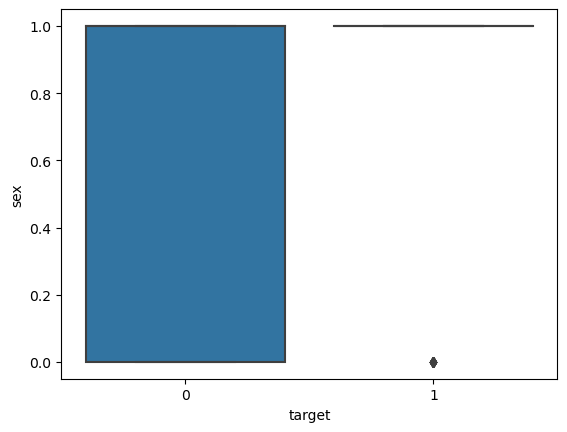

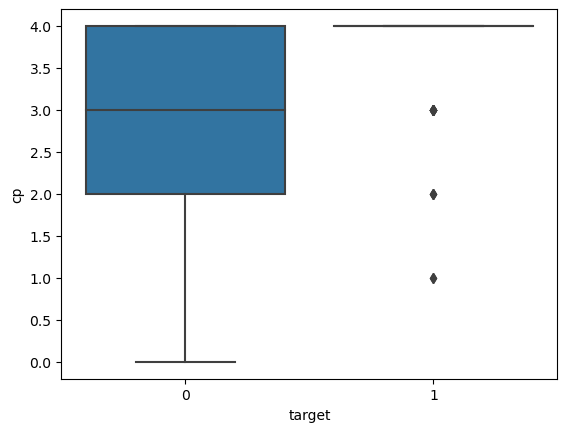

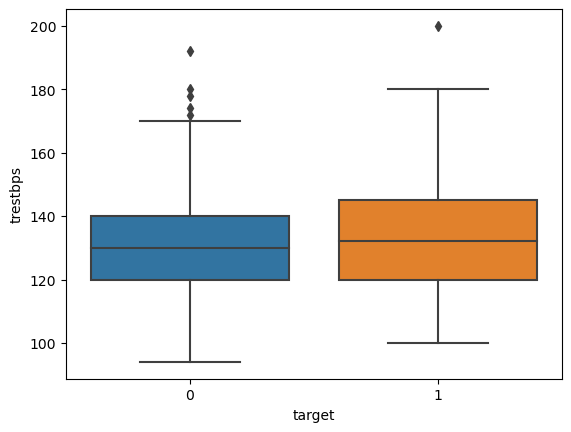

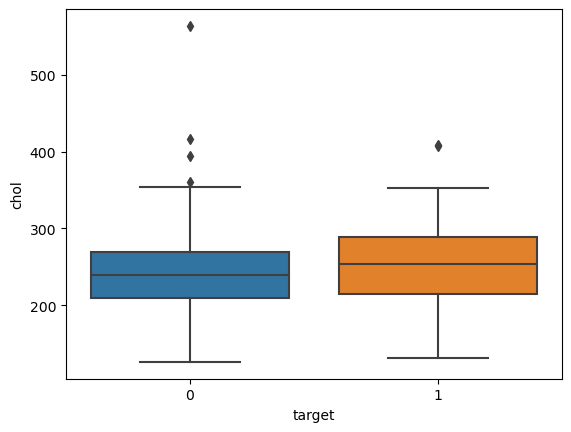

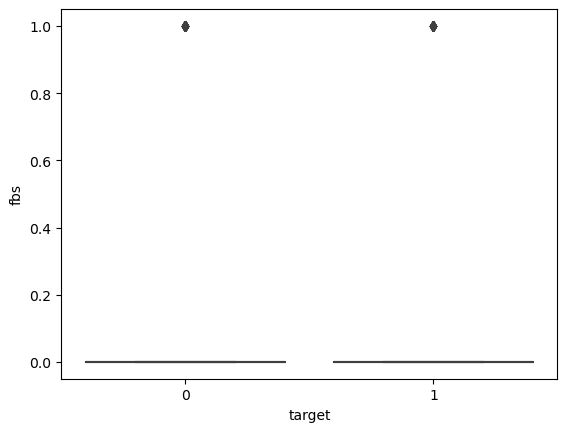

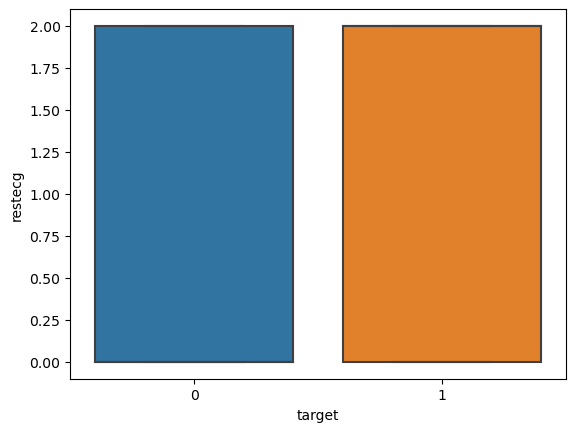

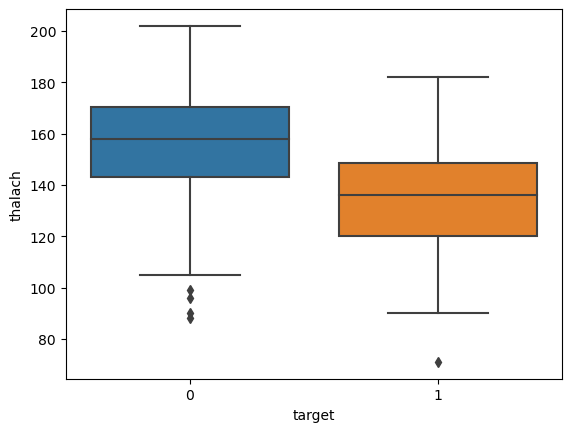

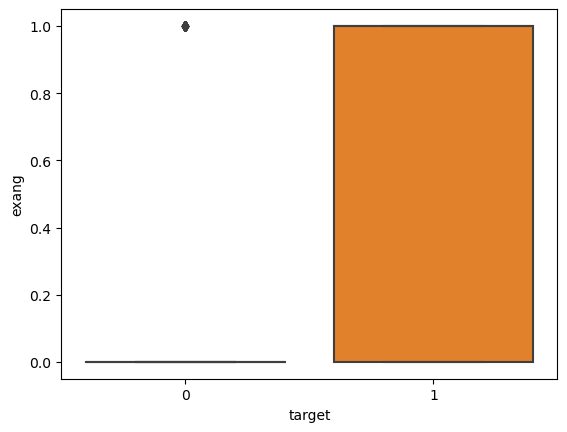

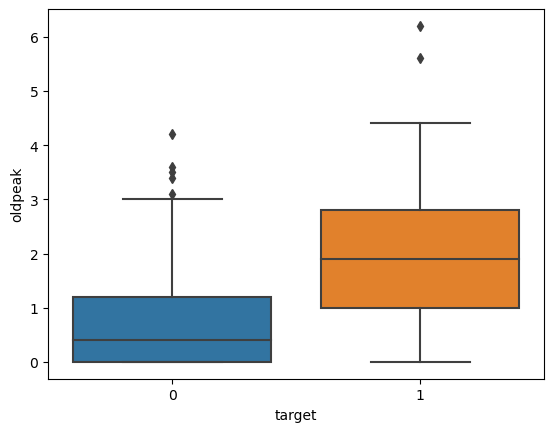

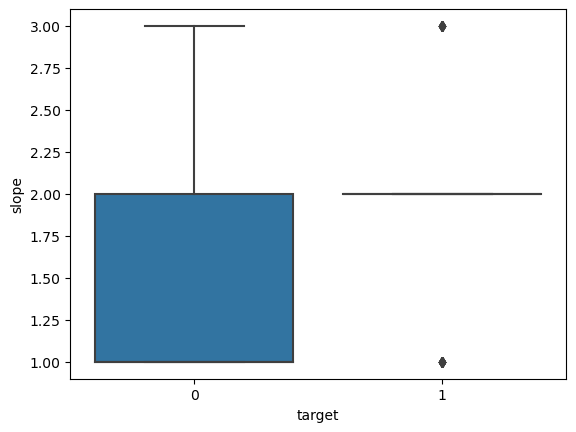

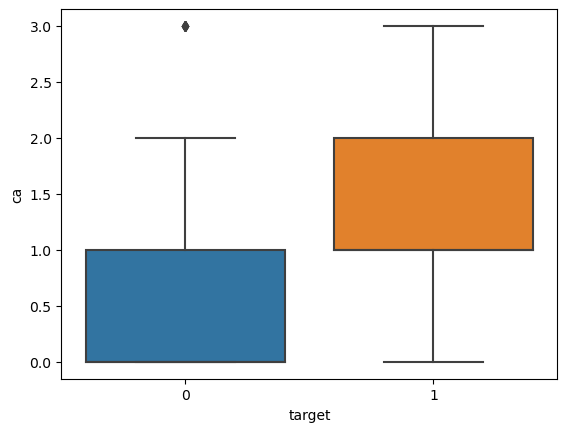

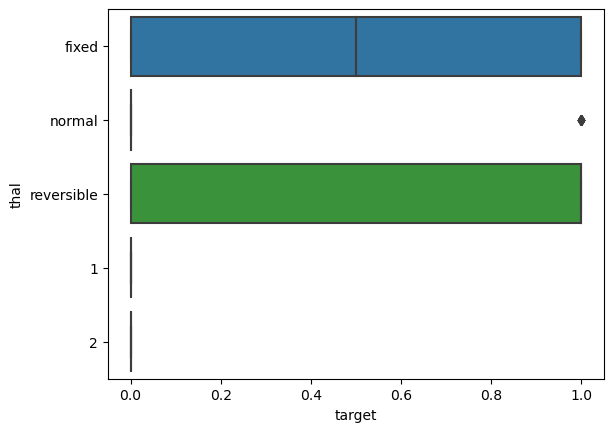

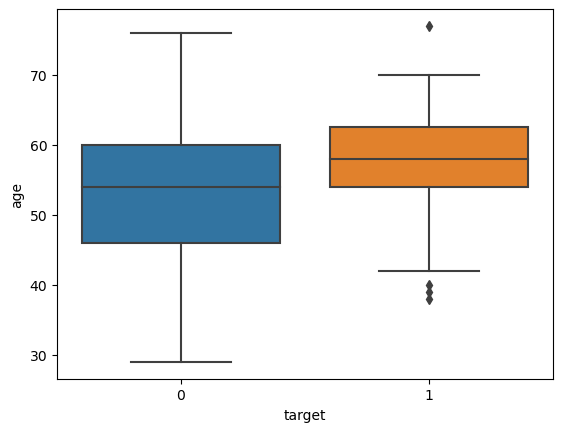

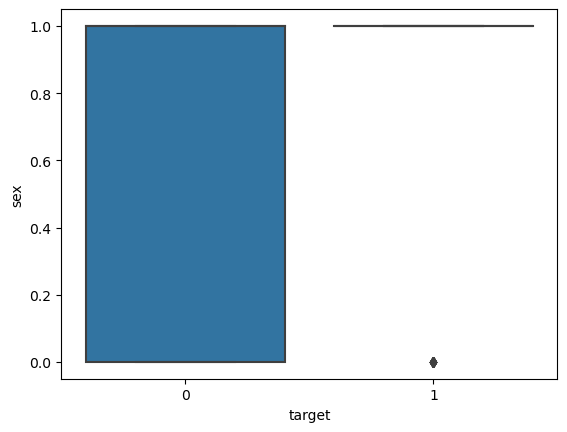

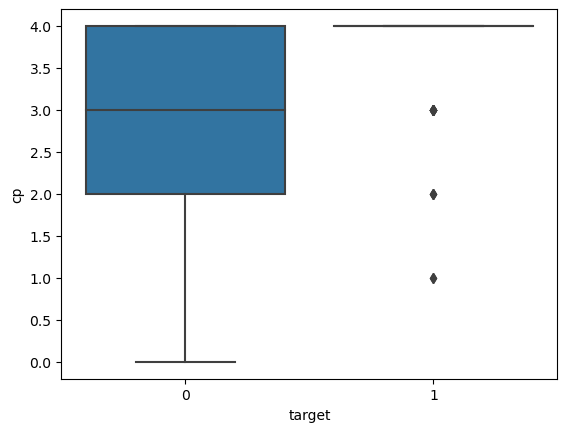

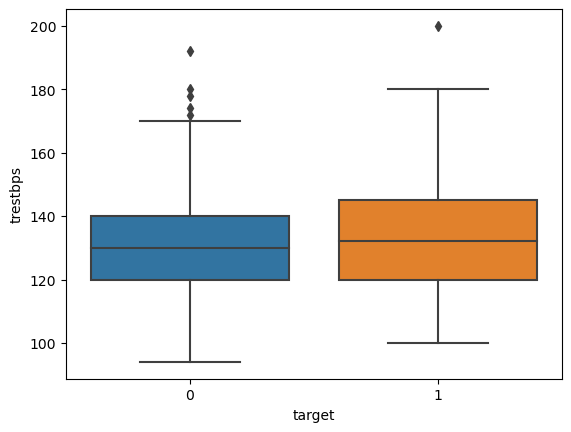

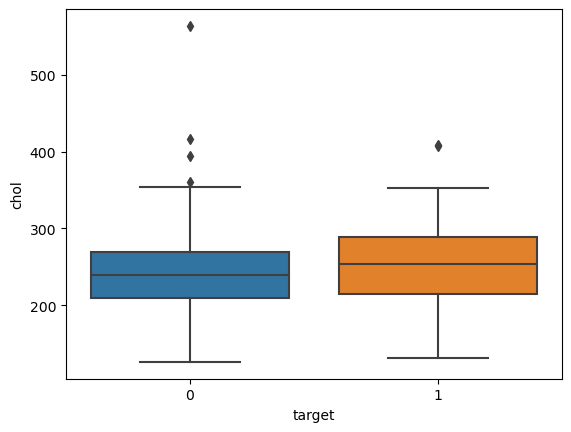

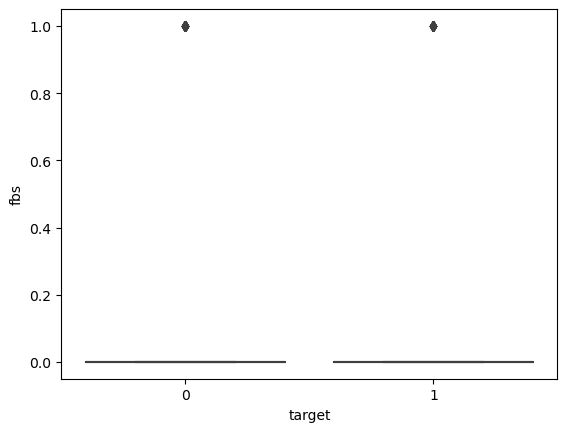

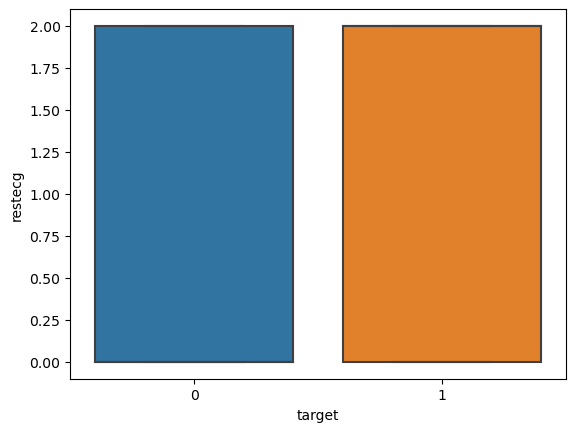

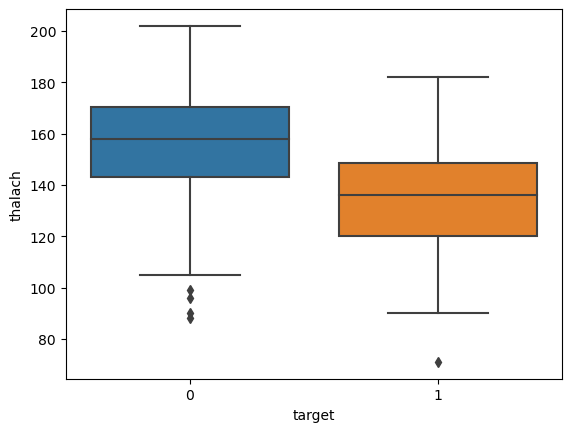

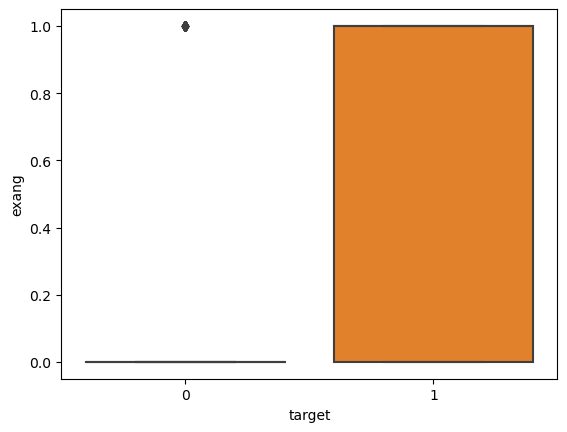

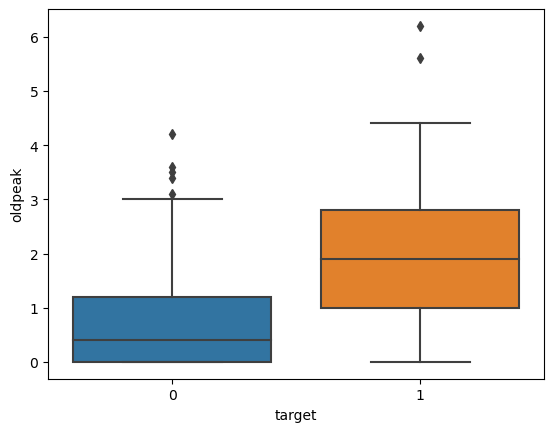

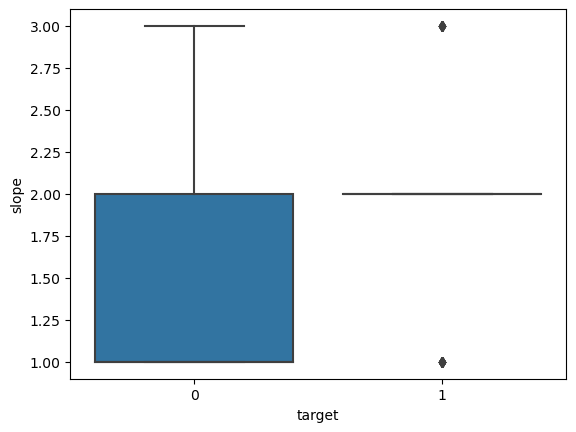

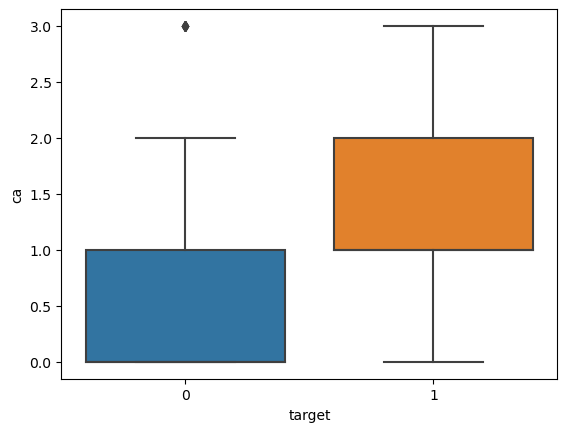

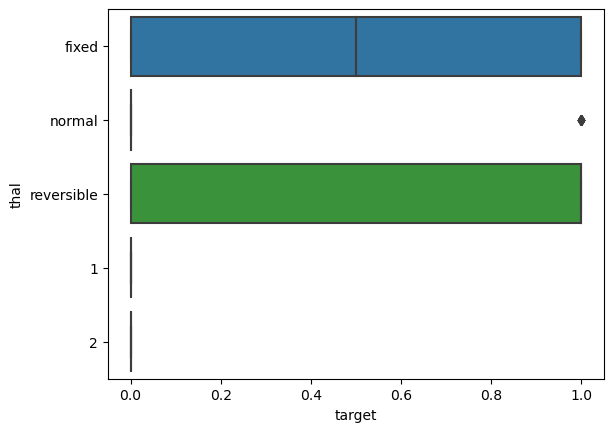

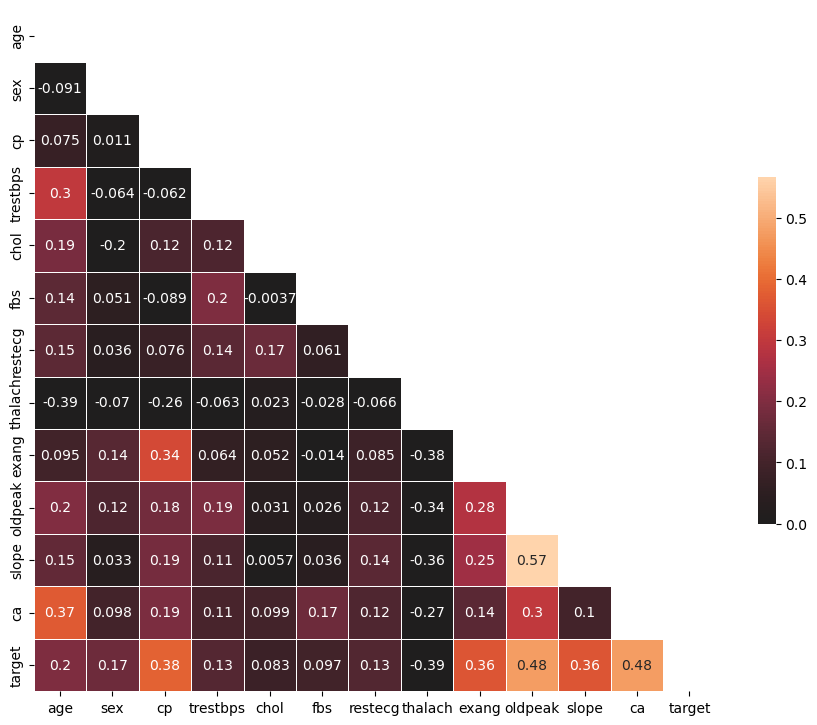

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=0.0, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.show()

In [69]:
features=df.columns[0:-1]
response=df.columns[-1]

features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [70]:
for feature in features:
    plt.figure()
    sns.boxplot(data=df,x='target',y=feature)

## (c) Standardisierung und One-hot-Encoding

Die folgenden Merkmale sind kategorische Merkmale, die als ganze Zahlen kodiert sind:

- `Geschlecht`
- `cp` 
- `fbs`
- `restecg`
- `exang`
- `ca`

Wir kodieren diese Merkmale mit **one-hot encoding**. Wir haben zwei Optionen

In [71]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object


In [72]:
categorical= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal']

df_onehot=pd.get_dummies(data=df.iloc[:,1:-1],columns=categorical)

features=df_onehot.columns
features


Index(['trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'thal_1', 'thal_2', 'thal_fixed', 'thal_normal',
       'thal_reversible'],
      dtype='object')

In [73]:
df_onehot.head()

,trestbps,chol,thalach,oldpeak,slope,sex_0,sex_1,cp_0,cp_1,cp_2,...,exang_1,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,145,233,150,2.3,3,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,160,286,108,1.5,2,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,120,229,129,2.6,2,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,130,250,187,3.5,3,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,130,204,172,1.4,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


## (d) Aufteilen in einen Trainings- und Validierungsdatensatz

Wir teilen den Datensatz auf in einen Trainings- und Validierungsdatensatz. Hierfür verwenden wir direkt die Methoden `df.sample` und `df.drop()` eines Pandas-Datenframes `df`. 

In [74]:
#Generate Dataframe with correct encodiding
numericFeatures=features[0:5]
categoricFeatures=features[5:]

print(numericFeatures)
print(categoricFeatures)

Index(['trestbps', 'chol', 'thalach', 'oldpeak', 'slope'], dtype='object')
Index(['sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0',
       'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_1', 'thal_2', 'thal_fixed',
       'thal_normal', 'thal_reversible'],
      dtype='object')


In [75]:
df_onehot[features].dtypes

trestbps             int64
chol                 int64
thalach              int64
oldpeak            float64
slope                int64
sex_0                uint8
sex_1                uint8
cp_0                 uint8
cp_1                 uint8
cp_2                 uint8
cp_3                 uint8
cp_4                 uint8
fbs_0                uint8
fbs_1                uint8
restecg_0            uint8
restecg_1            uint8
restecg_2            uint8
exang_0              uint8
exang_1              uint8
ca_0                 uint8
ca_1                 uint8
ca_2                 uint8
ca_3                 uint8
thal_1               uint8
thal_2               uint8
thal_fixed           uint8
thal_normal          uint8
thal_reversible      uint8
dtype: object

In [76]:
X=df_onehot[features].to_numpy()
y=df['target'].to_numpy()

In [77]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
X_train

array([[150., 276., 112., ...,   1.,   0.,   0.],
       [110., 229., 168., ...,   0.,   0.,   1.],
       [130., 315., 162., ...,   0.,   1.,   0.],
       ...,
       [125., 300., 171., ...,   0.,   0.,   1.],
       [125., 273., 152., ...,   0.,   1.,   0.],
       [160., 289., 145., ...,   0.,   0.,   1.]])

In [79]:
dg=pd.DataFrame(data=X_train, columns=features)
dg.head()

,trestbps,chol,thalach,oldpeak,slope,sex_0,sex_1,cp_0,cp_1,cp_2,...,exang_1,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,150.0,276.0,112.0,0.6,2.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,110.0,229.0,168.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,130.0,315.0,162.0,1.9,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,108.0,309.0,156.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,142.0,177.0,160.0,1.4,3.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## (e) Standardisieren der quantitativen, kontinuierlichen Merkmale

In [81]:
from sklearn.preprocessing import StandardScaler

myScaler=StandardScaler()
Xtrain= np.hstack((myScaler.fit_transform(X_train[:,0:5]),X_train[:,5:]))
Xtest = np.hstack((myScaler.fit_transform(X_test[:,0:5]),X_test[:,5:]))


In [82]:
np.shape(Xtrain)

(203, 28)

In [83]:
np.shape(y_train.reshape(-1,1))

(203, 1)

In [84]:
trainData=np.hstack((Xtrain,y_train.reshape(-1,1)))
valData =np.hstack((Xtest,y_test.reshape(-1,1)))
fullFeatures=list(features)
fullFeatures.append('target')
print(fullFeatures)


['trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_1', 'thal_2', 'thal_fixed', 'thal_normal', 'thal_reversible', 'target']


In [85]:
train_dataframe=pd.DataFrame(data=trainData, columns=fullFeatures)
train_dataframe

,trestbps,chol,thalach,oldpeak,slope,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible,target
0,0.989775,0.533917,-1.577628,-0.398064,0.639961,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.234069,-0.403533,0.794343,-0.038522,2.224256,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.122147,1.311802,0.540203,0.770446,-0.944333,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.345261,1.192127,0.286064,-0.937376,-0.944333,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.545006,-1.440712,0.455490,0.321019,2.224256,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-0.344531,1.132290,0.582560,-0.937376,-0.944333,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199,-1.790030,-0.543153,-0.264572,0.141248,0.639961,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
200,-0.400128,1.012616,0.921413,-0.937376,-0.944333,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
201,-0.400128,0.474080,0.116637,-0.487949,2.224256,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
val_dataframe=pd.DataFrame(data=valData, columns=fullFeatures)
val_dataframe

,trestbps,chol,thalach,oldpeak,slope,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible,target
0,-0.755893,-1.661013,-1.042842,-0.228755,-0.989467,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.172192,-0.651059,-0.862186,0.724390,0.716511,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,-1.222853,-0.488745,0.402413,0.406675,0.716511,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.055452,-0.091978,1.125041,-0.864185,0.716511,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.639153,1.098325,0.086264,-0.546470,0.716511,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.514704,-0.669094,1.034713,-0.864185,-0.989467,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96,-0.055452,0.376929,0.266921,-0.864185,-0.989467,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97,-0.172192,1.206534,0.944384,-0.864185,-0.989467,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,0.528249,-0.542850,0.718563,-0.864185,-0.989467,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## (f) Generieren eines `tf.data.Datasets`

Die [`tf.data` API](https://www.tensorflow.org/guide/data) ermöglicht es Ihnen, komplexe Eingangs-Pipelines aus einfachen, wiederverwendbaren Teilen aufzubauen. 
- Die Pipeline für ein Bildmodell könnte beispielsweise Daten aus Dateien in einem verteilten Dateisystem aggregieren, zufällige Störungen auf jedes Bild anwenden und zufällig ausgewählte Bilder zum Training zu einem Stapel zusammenführen. 
- Die Pipeline für ein Textmodell kann das Extrahieren von Symbolen aus Rohtextdaten, deren Umwandlung in Einbettungskennungen mit einer Nachschlagetabelle und das Zusammenführen von Sequenzen unterschiedlicher Länge umfassen. 
- Die `tf.data` API ermöglicht es , grosse Datenmengen zu verarbeiten, liest aus verschiedenen Datenformaten und ist in der Lage, komplexe Transformationen durchzuführen.

Die `tf.data`-API führt ein `tf.data.Dataset`-Objekt ein, welches eine Sequenz von Elementen darstellt, wobei jedes Element aus einer oder mehreren Komponenten besteht. In einer Bild-Pipeline könnte ein Element zum Beispiel ein einzelnes Trainingsbeispiel sein, mit je zwei Tensoren, die das Bild und sein Label darstellen.

Es gibt zwei verschiedene Möglichkeiten, ein Dataset zu erstellen:

1. Eine Datenquelle konstruiert ein Dataset aus Daten, die im Speicher oder in einer oder mehreren Dateien gespeichert sind.
2. Eine Datentransformation konstruiert ein Dataset aus einem oder mehreren `tf.data.Dataset`-Objekten.


### Grundlegende Mechanismen

Um eine Eingabe-Pipeline zu erstellen, müssen Sie mit einer Datenquelle beginnen. Um beispielsweise ein Dataset aus Daten im Speicher zu erstellen, können Sie tf.data.Dataset.from_tensors() oder `tf.data.Dataset.from_tensor_slices()` verwenden. Wenn Ihre Eingabedaten in einer Datei im empfohlenen `TFRecord`-Format gespeichert sind, können Sie alternativ `tf.data.TFRecordDataset()` verwenden.

Sobald Sie ein Dataset-Objekt haben, können Sie es in ein neues Dataset umwandeln, indem Sie Methodenaufrufe für das `tf.data.Dataset`-Objekt verketten. Zum Beispiel können Sie Transformationen pro Element wie `Dataset.map()` und Transformationen mit mehreren Elementen wie `Dataset.batch()` anwenden. Eine vollständige Liste der Transformationen finden Sie in der Dokumentation zu `tf.data.Dataset`.

Das Dataset-Objekt ist eine `Python-Iterable`. Dadurch ist es möglich, seine Elemente mit einer `for`-Schleife zu verarbeiten:


In [90]:
def dataframe_to_dataset(df):
    dg = df.copy()
    labels = dg.pop('target')
    dataset = tf.data.Dataset.from_tensor_slices((dg.values, labels.values))
    dataset = dataset.batch(32).repeat()
    dataset = dataset.shuffle(buffer_size=len(df))
    return dataset

In [91]:
train_dataset=dataframe_to_dataset(train_dataframe)
val_dataset  =dataframe_to_dataset(val_dataframe)

## (g) Erstellen der Modellarchitektur

In [92]:
# Returns a placeholder tensor
inputs = layers.Input(shape=(28,))  

# A layer instance is callable on a tensor, and returns a tensor.
x = layers.Dense(32, activation="relu")(inputs)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model1 = keras.Model(inputs, output)

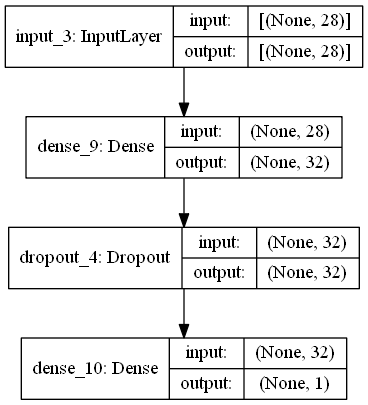

In [93]:
keras.utils.plot_model(model1, to_file='dropout_classifcation.png', show_shapes=True)


In [94]:
# The compile step specifies the training configuration.
model1.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])



## (h) Trainieren

In [95]:
# Train for 50 epochs
history=model1.fit(train_dataset, epochs=50, 
          steps_per_epoch=100,
          validation_data=val_dataset,
          validation_steps=10)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.5102 - accuracy: 0.7464 - val_loss: 0.3529 - val_accuracy: 0.8371
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.8334 - val_loss: 0.3281 - val_accuracy: 0.8390
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8427 - val_loss: 0.2950 - val_accuracy: 0.8686
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8547 - val_loss: 0.2886 - val_accuracy: 0.8771
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.8689 - val_loss: 0.2931 - val_accuracy: 0.8771
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.2737 - accuracy: 0.8774 - val_loss: 0.3089 - val_accuracy: 0.8523
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.2678 - accuracy: 0.8769 - val_loss: 0.3099 - val_accuracy: 0.8523
Epoch 

## (i) Lernkurven

In [96]:
def print_history(history):
    #print(history.history.keys())
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid(True); plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid(True); plt.show()

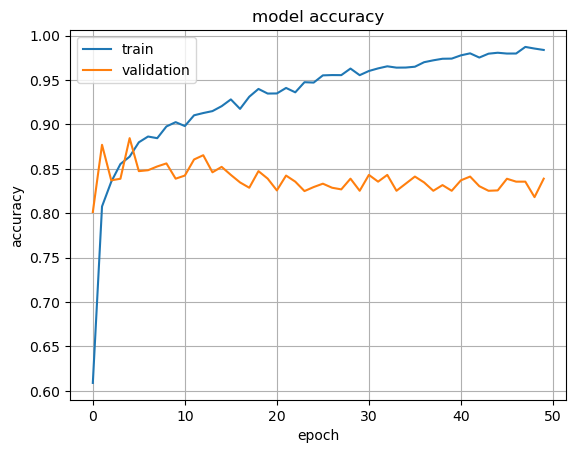

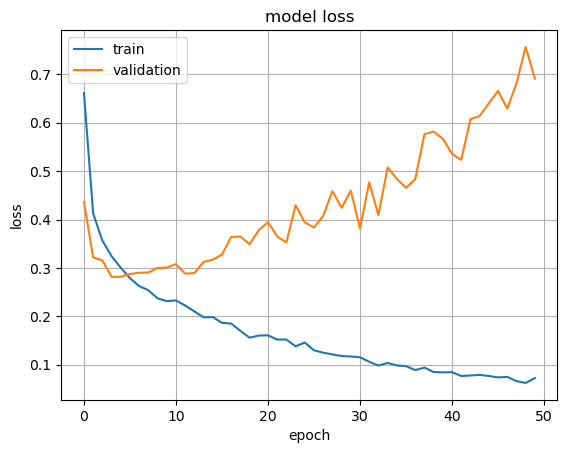

In [33]:
print_history(history)

## (j) Ein etwas anderes Netzwerk

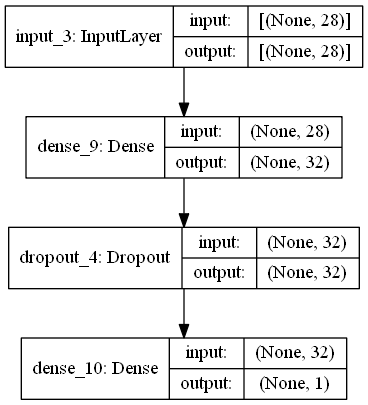

In [97]:
# Returns a placeholder tensor
inputs = layers.Input(shape=(28,))  

# A layer instance is callable on a tensor, and returns a tensor.
x = layers.Dense(16, activation="relu")(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)


model2 = keras.Model(inputs, output)

keras.utils.plot_model(model1, to_file='dropout_classifcation.png', show_shapes=True)




In [98]:
# The compile step specifies the training configuration.
model2.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

# Trains for 50 epochs
history=model2.fit(train_dataset, epochs=50, 
          steps_per_epoch=100,
          validation_data=val_dataset,
          validation_steps=10)

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.5550 - accuracy: 0.7120 - val_loss: 0.3669 - val_accuracy: 0.8389
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8115 - val_loss: 0.2941 - val_accuracy: 0.8602
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3496 - accuracy: 0.8424 - val_loss: 0.3016 - val_accuracy: 0.8485
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3128 - accuracy: 0.8633 - val_loss: 0.2707 - val_accuracy: 0.8485
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.2787 - accuracy: 0.8833 - val_loss: 0.2922 - val_accuracy: 0.8699
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.2734 - accuracy: 0.8789 - val_loss: 0.2868 - val_accuracy: 0.8699
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.2442 - accuracy: 0.8892 - val_loss: 0.2676 - val_accuracy: 0.8846
Epoch 

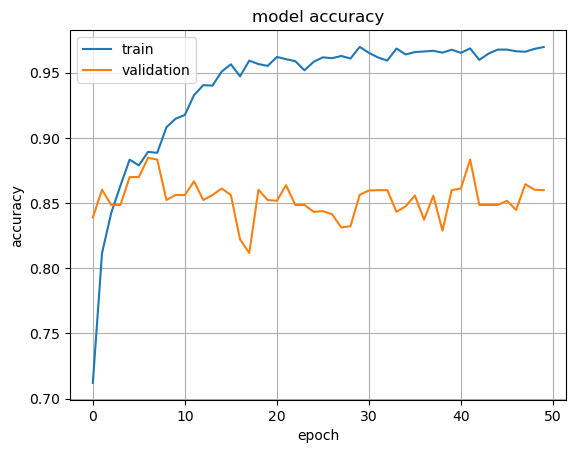

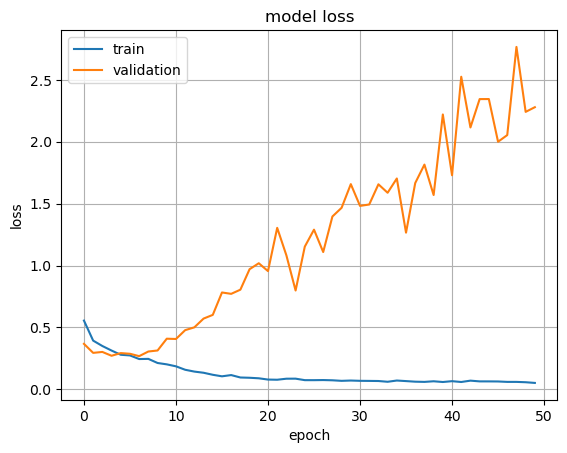

In [100]:
plt.figure()
print_history(history)

# A2: Feature Encoding mit `keras`

## (b) Aufteilen in einen Trainings- und Validierungsdatensatz 

In [51]:
val_dataframe   = df.sample(frac=0.2, random_state=1337)
train_dataframe = df.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 242 samples for training and 61 for validation


## (c) `tensorflow.data.dataset`-Objekt als Dictionary der einzelnen Merkmale

In [50]:
def df2dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


In [52]:
train_ds = df2dataset(train_dataframe)
val_ds = df2dataset(val_dataframe)

In [53]:
train_ds

<ShuffleDataset shapes: ({age: (), sex: (), cp: (), trestbps: (), chol: (), fbs: (), restecg: (), thalach: (), exang: (), oldpeak: (), slope: (), ca: (), thal: ()}, ()), types: ({age: tf.int64, sex: tf.int64, cp: tf.int64, trestbps: tf.int64, chol: tf.int64, fbs: tf.int64, restecg: tf.int64, thalach: tf.int64, exang: tf.int64, oldpeak: tf.float64, slope: tf.int64, ca: tf.int64, thal: tf.string}, tf.int64)>

## (d) Aufteilen in Batches

In [54]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

## (e) Preprocessing und Merkmals-Kodierung

In [101]:
from tensorflow.python.keras.layers.preprocessing.integer_lookup import IntegerLookup
from tensorflow.python.keras.layers.preprocessing.normalization import Normalization
from tensorflow.python.keras.layers.preprocessing.string_lookup import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

## (f) Jedes Merkmal als eigener Input-Tensor

In [102]:
# Categorical features encoded as integers
sex = keras.Input(shape=(1,), name="sex", dtype="int64")
cp  = keras.Input(shape=(1,), name="cp", dtype="int64")
fbs = keras.Input(shape=(1,), name="fbs", dtype="int64")
restecg = keras.Input(shape=(1,), name="restecg", dtype="int64")
exang   = keras.Input(shape=(1,), name="exang", dtype="int64")
ca = keras.Input(shape=(1,), name="ca", dtype="int64")

# Categorical feature encoded as string
thal = keras.Input(shape=(1,), name="thal", dtype="string")

# Numerical features
age = keras.Input(shape=(1,), name="age")
trestbps = keras.Input(shape=(1,), name="trestbps")
chol    = keras.Input(shape=(1,), name="chol")
thalach = keras.Input(shape=(1,), name="thalach")
oldpeak = keras.Input(shape=(1,), name="oldpeak")
slope   = keras.Input(shape=(1,), name="slope")

all_inputs = [
    sex,
    cp,
    fbs,
    restecg,
    exang,
    ca,
    thal,
    age,
    trestbps,
    chol,
    thalach,
    oldpeak,
    slope,
]


In [103]:
# Integer categorical features
sex_encoded = encode_categorical_feature(sex, "sex", train_ds, False)
cp_encoded = encode_categorical_feature(cp, "cp", train_ds, False)
fbs_encoded = encode_categorical_feature(fbs, "fbs", train_ds, False)
restecg_encoded = encode_categorical_feature(restecg, "restecg", train_ds, False)
exang_encoded = encode_categorical_feature(exang, "exang", train_ds, False)
ca_encoded = encode_categorical_feature(ca, "ca", train_ds, False)

# String categorical features
thal_encoded = encode_categorical_feature(thal, "thal", train_ds, True)

# Numerical features
age_encoded = encode_numerical_feature(age, "age", train_ds)
trestbps_encoded = encode_numerical_feature(trestbps, "trestbps", train_ds)
chol_encoded = encode_numerical_feature(chol, "chol", train_ds)
thalach_encoded = encode_numerical_feature(thalach, "thalach", train_ds)
oldpeak_encoded = encode_numerical_feature(oldpeak, "oldpeak", train_ds)
slope_encoded = encode_numerical_feature(slope, "slope", train_ds)

all_features = layers.concatenate(
    [
        sex_encoded,
        cp_encoded,
        fbs_encoded,
        restecg_encoded,
        exang_encoded,
        slope_encoded,
        ca_encoded,
        thal_encoded,
        age_encoded,
        trestbps_encoded,
        chol_encoded,
        thalach_encoded,
        oldpeak_encoded,
    ]
)

## (g) Netzarchitektur und Training

In [58]:
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

## (h) Darstellung

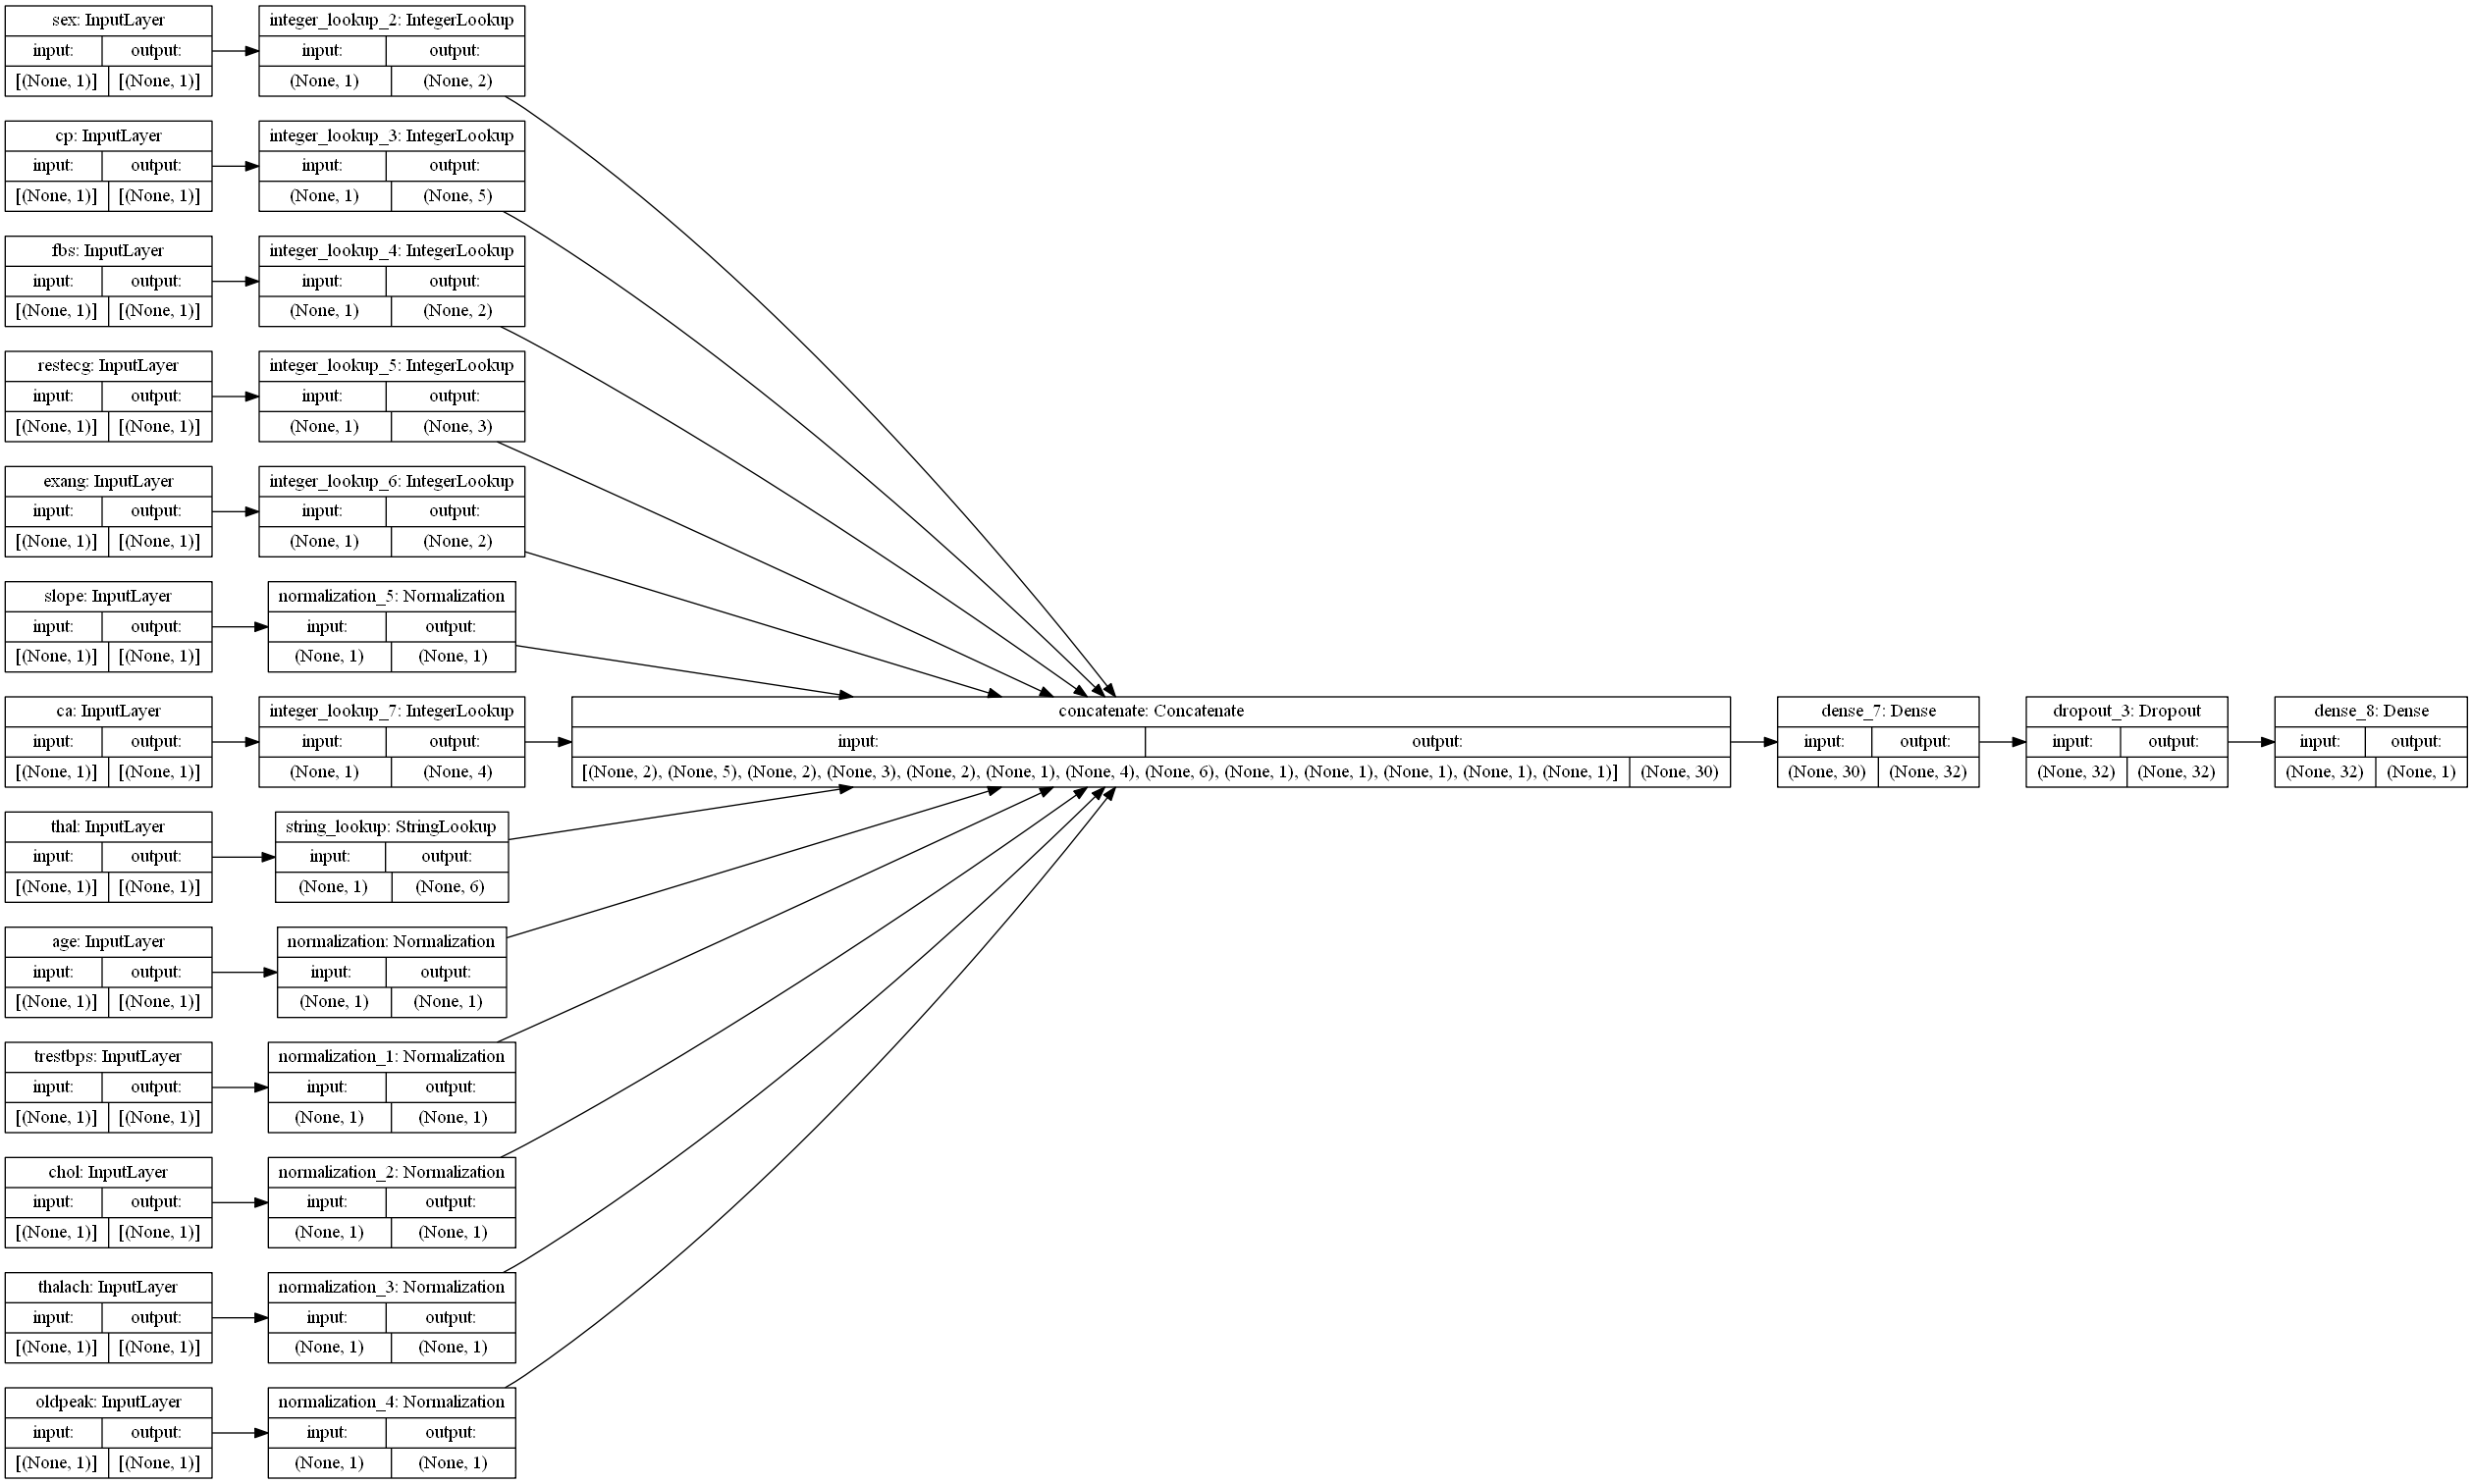

In [59]:
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## (h) Inferenz auf neue Daten

Um eine Vorhersage für eine neue Probe zu erhalten, können Sie einfach `model.predict()` aufrufen. Es gibt nur zwei Dinge, die Sie tun müssen:
1. Skalare in eine Liste einpacken, um eine Stapeldimension zu haben (Modelle verarbeiten nur Datenstapel, nicht einzelne Stichproben)
2. Rufen Sie `convert_to_tensor` für jedes Merkmal auf

In [60]:
sample = {
    "age": 60,
    "sex": 1,
    "cp": 1,
    "trestbps": 145,
    "chol": 233,
    "fbs": 1,
    "restecg": 2,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 2.3,
    "slope": 3,
    "ca": 0,
    "thal": "fixed",
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)

This particular patient had a 68.4 percent probability of having a heart disease, as evaluated by our model.
